# Communicate-Data-Finding-Slide-Deck-with-Ford-GoBike-System-Data
## by Gunja Chotai

## Investigation Overview

> Here I discuss What are the factore affect most during the trip.

## Dataset Overview

> This dataset provide inforation about bike rides made in a bike-sharing system in the greater San Francisco Bay area.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
curDir = os.getcwd()
path = curDir+'/fordgobike/'
text_files = os.listdir(path)
#text_files

# build the frame df by appending each file
file_list = []
print ("reading data... ")
for text_file in text_files:
    #print(text_file)
    filename = path+text_file
    #print(filename)
    df = pd.read_csv(filename)
    file_list.append(df)
df_bike = pd.concat(file_list) 

df =  df_bike.copy()   
print(df.shape)

reading data... 
(1863721, 14)


### What is the structure of your dataset?

There are 186372 data trips for fordgobike in the dataset with 14 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, bike_share_for_all_trip). Most variables are 6 numerical, and others are 2 datetime and 6 object type.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out how trip duration is dependent on other features such as: start month, duration, and user_type from the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that trip duration will have the strongest effect on each the start stations and end stations becouse the crowded places should receive more rides. I also think that user_type will have effects on trip duration.

In [4]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


## (Visualization 1)
> Question 1: I want to know is "What is the distribution of trip duration?"

Text(0, 0.5, 'Frequency')

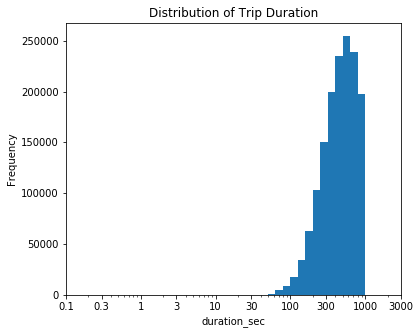

In [5]:
bin_edges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300,1000,3000]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=[6,5])
plt.hist(data = df , x = 'duration_sec' , bins = bin_edges);
plt.xticks(ticks,labels);
plt.xlabel('duration_sec');
plt.xscale('log');
plt.xticks(ticks,labels);
plt.title('Distribution of Trip Duration')
plt.ylabel('Frequency')

> Conclusion 1: We can see from the distribution , the trip duration of most users is about 10 mins

## (Visualization 2)

> Question 2: Does weather(month) affect the trip duration ?

Text(0, 0.5, 'Trip Duration(sec)')

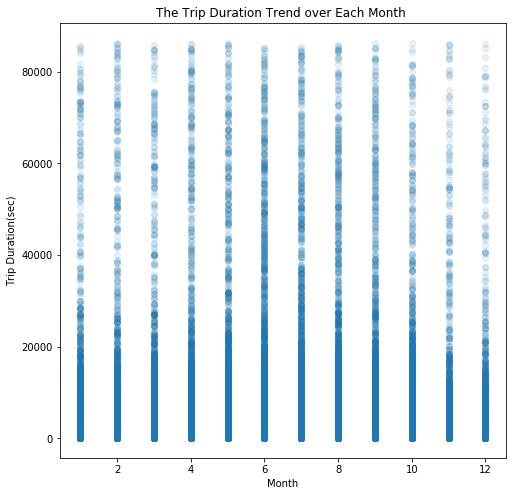

In [6]:
df['month_start'] = pd.DatetimeIndex(df['start_time']).month
# We can check the trip duration over changes over each month.
plt.figure(figsize = [8,8]) # make the whole figure bigger to show all 
plt.scatter(data = df , x = 'month_start' , y = 'duration_sec' , alpha = 0.1 );
plt.title('The Trip Duration Trend over Each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(sec)')

> Conclusion 2: Using above chart we can say that june and july is a pick month for bike sharing in San Francisco Bay Area. And from november to march is off month.

>Question 3: Do seasons have a more significant effect the trip duration ?

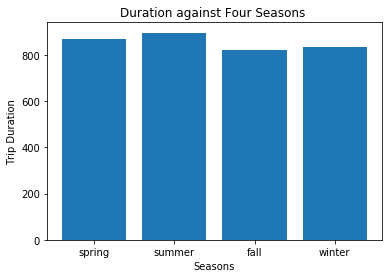

In [17]:
# Create 4 season categories
spring_dur = df.query('month_start in ["3" , "4" , "5"]' ).duration_sec.mean ()
summer_dur = df.query('month_start in ["6" , "7" , "8"] ').duration_sec.mean()
fall_dur = df.query('month_start in ["9" , "10" , "11"] ').duration_sec.mean()
winter_dur = df.query('month_start in ["12" , "1" , "2"]' ).duration_sec.mean()

plt.bar(['spring','summer','fall','winter'],[spring_dur , summer_dur , fall_dur , winter_dur] )
plt.title('Duration against Four Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

> Conclusion 3: From above chart we can say that there is no more diffrence getting season. It has some affect over the trip duration but the influence is very limited. Summer and Spring have relatively higher trip duration. Fall turns to have the lowest trip duration.

## (Visualization 3)
> Question 4: Does user type lead to the lower trip duration?


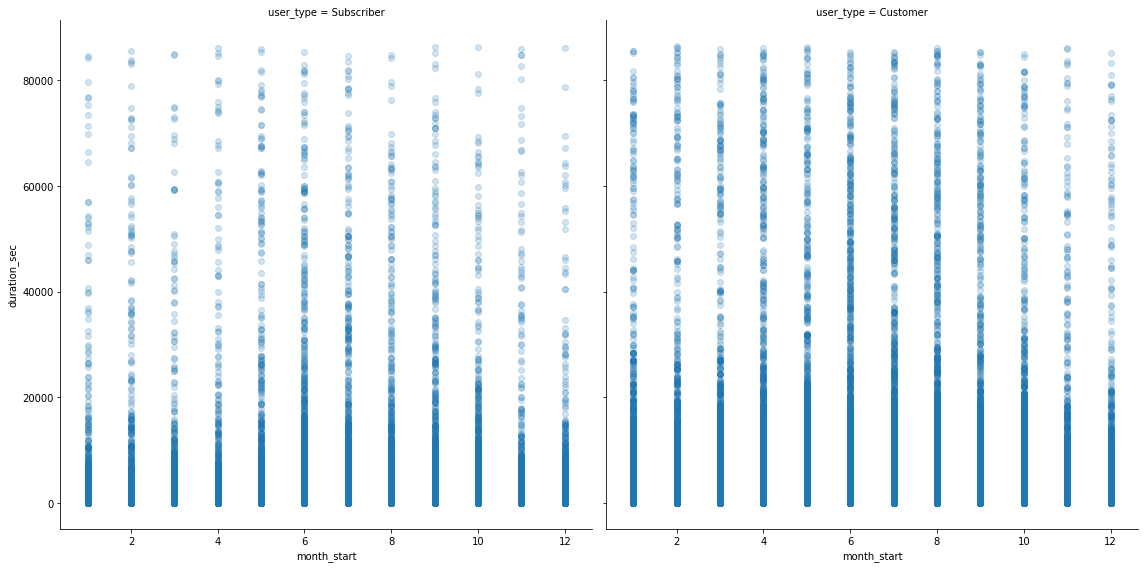

In [18]:
m = sb.FacetGrid(data =  df, col = 'user_type', size = 8, col_wrap = 2)
m.map(sb.regplot, 'month_start', 'duration_sec', y_jitter = 0.04, fit_reg = False,scatter_kws = {'alpha' : 1/5});

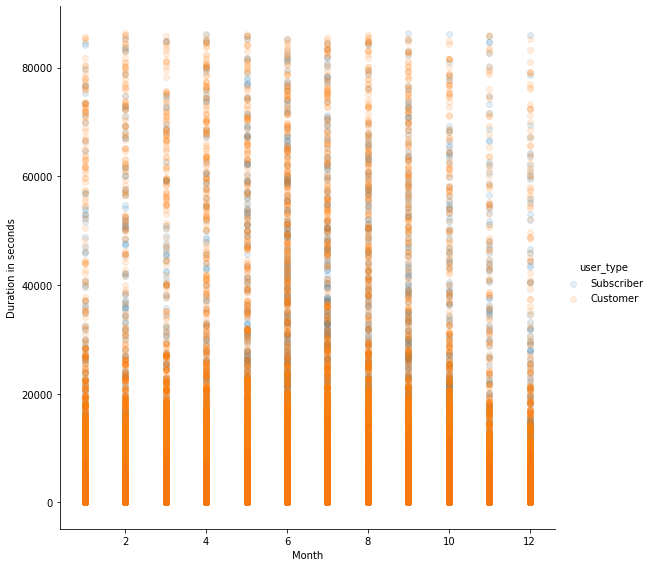

In [20]:
month = sb.FacetGrid(data = df, hue = 'user_type', hue_order = ['Subscriber','Customer'], size = 8)
month.map(plt.scatter, 'month_start','duration_sec', alpha = 1/8)
month.add_legend()
plt.xlabel('Month')
plt.ylabel('Duration in seconds');

> Conclusion 4: There are far more customers than subscribers using the bike sharing service. Mostly subscribers are using the service for longer trips.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!